In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
data = pd.DataFrame()

data['Teams'] = ['CSK', 'SRH', 'MI', 'RR', 'KXIP', 'DC', 'KKR', 'RCB']
data['Captains'] = ['MS Dhoni', 'David Warner', 'Rohit Sharma', 'Steve Smith', 'KL Rahul', 'Shreyas Iyer', 'Dinesh Karthik', 'Virat Kohli']
data['Wins'] = ['3', '2', '5', '1', '0', '0', '2', '0']
data['Owner'] = [['Chennai Super Kings Cricket Limited'], ['Sun TV Network'], ['Reliance Industries'], ['Amisha Hathiramani', 'Manoj Badale', 'Lachlan Murdoch', 'Ryan Tkalcevic', 'Shane Warne'], ['Mohit Burman', 'Ness Wadia', 'Preity Zinta', 'Karan Paul'], ['GMR Group', 'JSW Group'], ['Red Chillies Entertainment', 'Mehta Group'], ['United Spirits']]
data['Country'] = ['India', 'Australia', 'India', 'Australia', 'India', 'India', 'India', 'India']

In [3]:
df = pd.DataFrame()

owner_list = []

for i in range(len(data['Owner'])):
    for owner in data['Owner'][i]:
        owner_list.append(owner)

df['Owners'] = owner_list
df['Type'] = ['Business', 'Business', 'Business', 'Individual', 'Individual', 'Individual', 'Individual', 'Individual', 'Individual', 'Individual', 'Individual', 'Individual', 'Business', 'Business', 'Business', 'Business', 'Business']

In [4]:
def create_graph(final_nodes):
    
    source = []
    target = []
    edge = []
    indexes = []

    for i in (range(len(final_nodes))):
        ent1 = final_nodes[i][0]
        ent2 = final_nodes[i][2]
        rel = final_nodes[i][1] 
        source.append(ent1.lower().strip())
        target.append(ent2.lower().strip())
        edge.append("".join(rel).strip())
        indexes.append(i)
        
    if(len(edge) == 0 or len(final_nodes) == 0):
        return None
    else:
        G = nx.DiGraph(directed=True)
        for i in (range(len(edge))):
            G.add_weighted_edges_from([(source[i], target[i], i)])
        print(G.nodes)
        print(G.edges)
        print("\nGraph generated")
        size = 20
        if (len(edge)/2 > 20):
            size = len(edge)/2
        plt.figure(figsize = (size, size))
        edge_labels=dict([((u,v,), edge[d['weight']]) for u, v, d in G.edges(data=True)])
        pos = nx.spring_layout(G,k=0.8)
        nx.draw(G, with_labels=True, node_color='lightblue', node_size=5000, edge_color='r', edge_cmap=plt.cm.Blues, pos=pos, font_size=20)
        nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_labels, font_size=15)
        return G, edge_labels

['csk', 'ms dhoni', '3', 'chennai super kings cricket limited', 'srh', 'david warner', '2', 'sun tv network', 'mi', 'rohit sharma', '5', 'reliance industries', 'business', 'india', 'australia']
[('csk', 'ms dhoni'), ('csk', '3'), ('csk', 'chennai super kings cricket limited'), ('ms dhoni', 'india'), ('chennai super kings cricket limited', 'business'), ('srh', 'david warner'), ('srh', '2'), ('srh', 'sun tv network'), ('david warner', 'australia'), ('sun tv network', 'business'), ('mi', 'rohit sharma'), ('mi', '5'), ('mi', 'reliance industries'), ('rohit sharma', 'india'), ('reliance industries', 'business')]

Graph generated


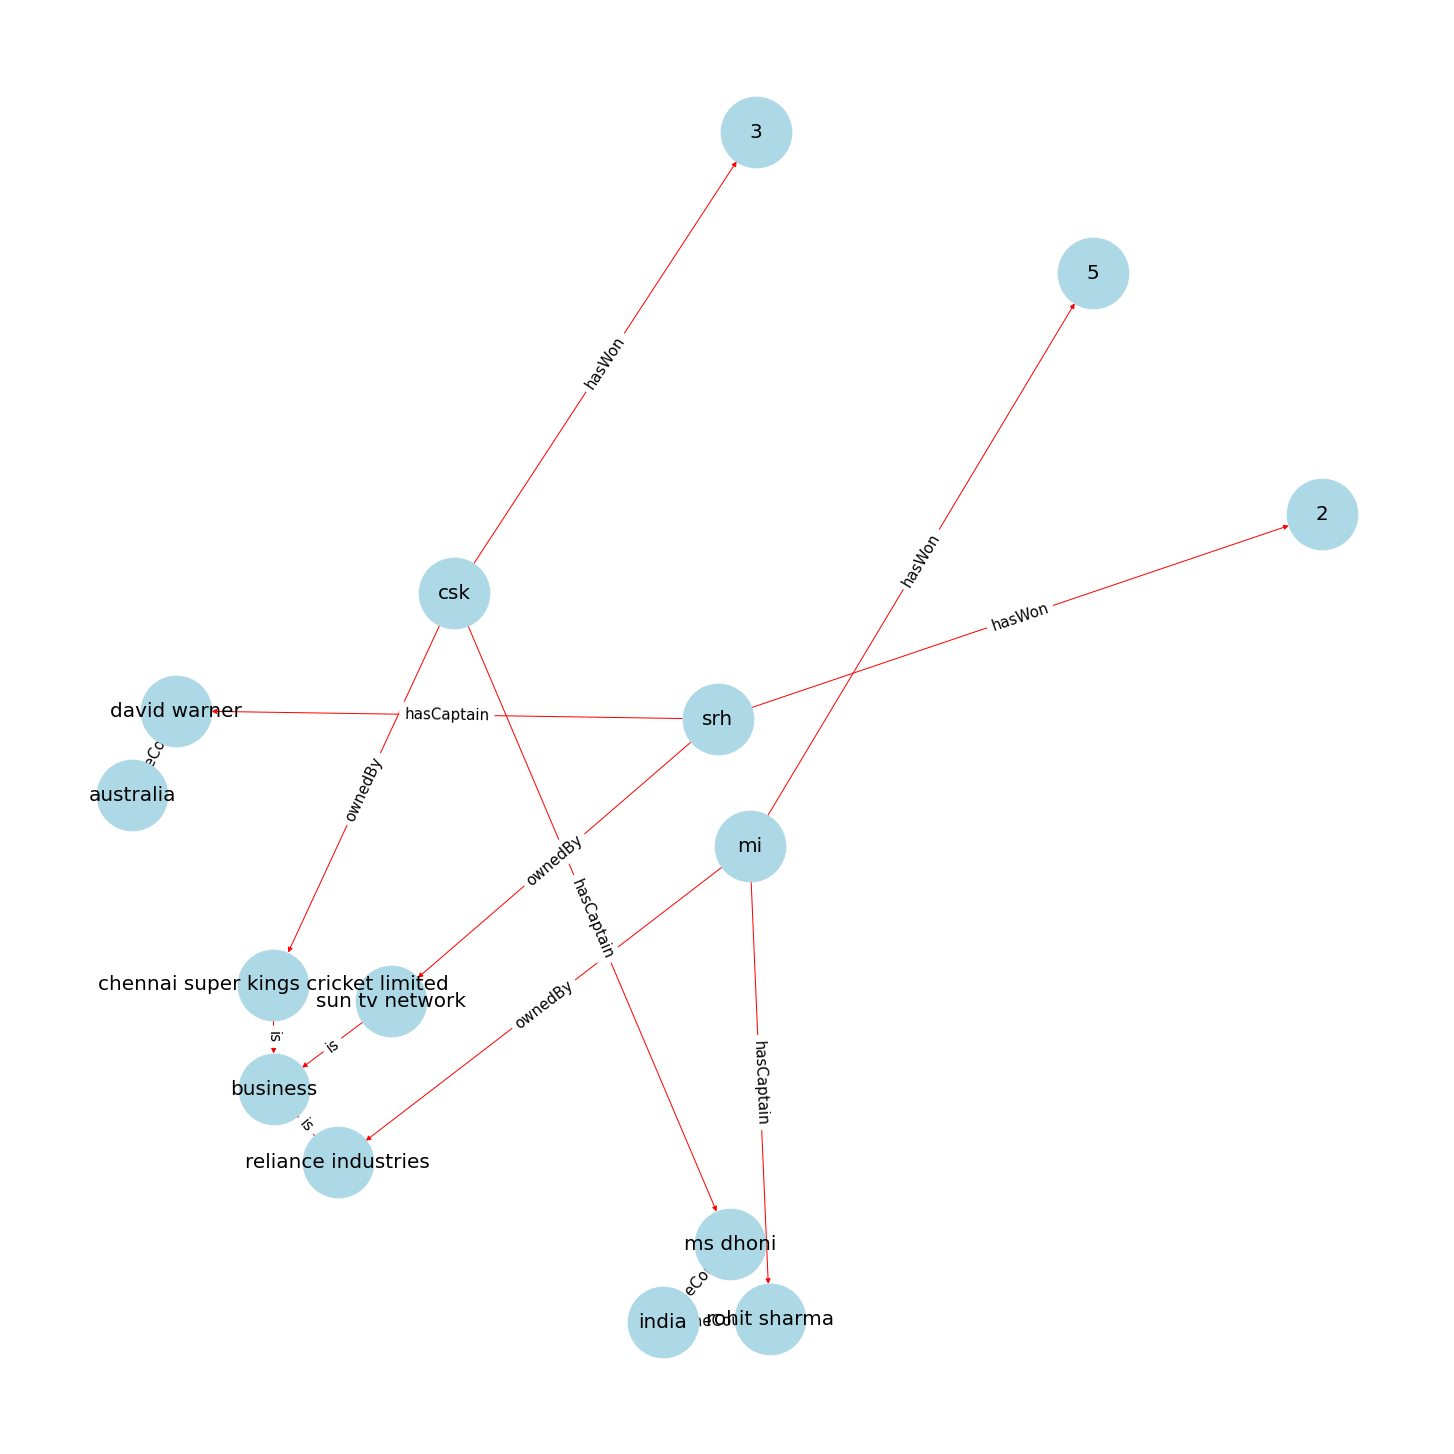

In [5]:
nodes = []

for i in range(len(data['Teams'])-5):
    nodes.append((data['Teams'][i], 'hasCaptain', data['Captains'][i]))
    nodes.append((data['Teams'][i], 'hasWon', data['Wins'][i]))
    for owner in data['Owner'][i]:
        nodes.append((data['Teams'][i], 'ownedBy', owner))
        
for i in range(len(df['Owners'])-14):
    nodes.append((df['Owners'][i], 'is', df['Type'][i]))
    
for i in range(len(data['Captains'])-5):
    nodes.append((data['Captains'][i], 'homeCoutry', data['Country'][i]))

create_graph(nodes)
plt.savefig('images/graph.png')

In [6]:
d = pd.read_csv('table1.csv')
d.head()

,Teams,Captains,Wins,Owner
0,CSK,MS Dhoni,3,['Chennai Super Kings Cricket Limited']
1,SRH,David Warner,2,['Sun TV Network']
2,MI,Rohit Sharma,5,['Reliance Industries']
3,RR,Steve Smith,1,"['Amisha Hathiramani', 'Manoj Badale', 'Lachla..."
4,KXIP,KL Rahul,0,"['Mohit Burman', 'Ness Wadia', 'Preity Zinta',..."
